In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
image = cv2.imread('Grade_A/IMG_3126.jpeg')


In [25]:
# 创建一个与输入图像大小相同的掩膜
mask = np.zeros(image.shape[:2], np.uint8)

# 创建grabcut算法所需的模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 定义感兴趣区域(ROI)
x = int(3024 * 0.15)
y = int(4032 * 0.05)
w = int(3024 * 0.7)
h = int(4032 * 0.9)

rect = (x, y, w, h)

# 使用grabcut算法
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 显示中间掩膜结果
intermediate_mask = np.where((mask == 1) | (mask == 3), 1, 0).astype('uint8') * 255

# 将掩膜中的值更改为0和1
mask2 = np.where((mask == 1) | (mask == 3), 1, 0).astype('uint8')

# 应用掩膜
result = image * mask2[:, :, np.newaxis]

# 将BGR图像转换为RGB图像以在Matplotlib中正确显示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

result_gray = cv2.cvtColor(result_rgb, cv2.COLOR_RGB2GRAY)



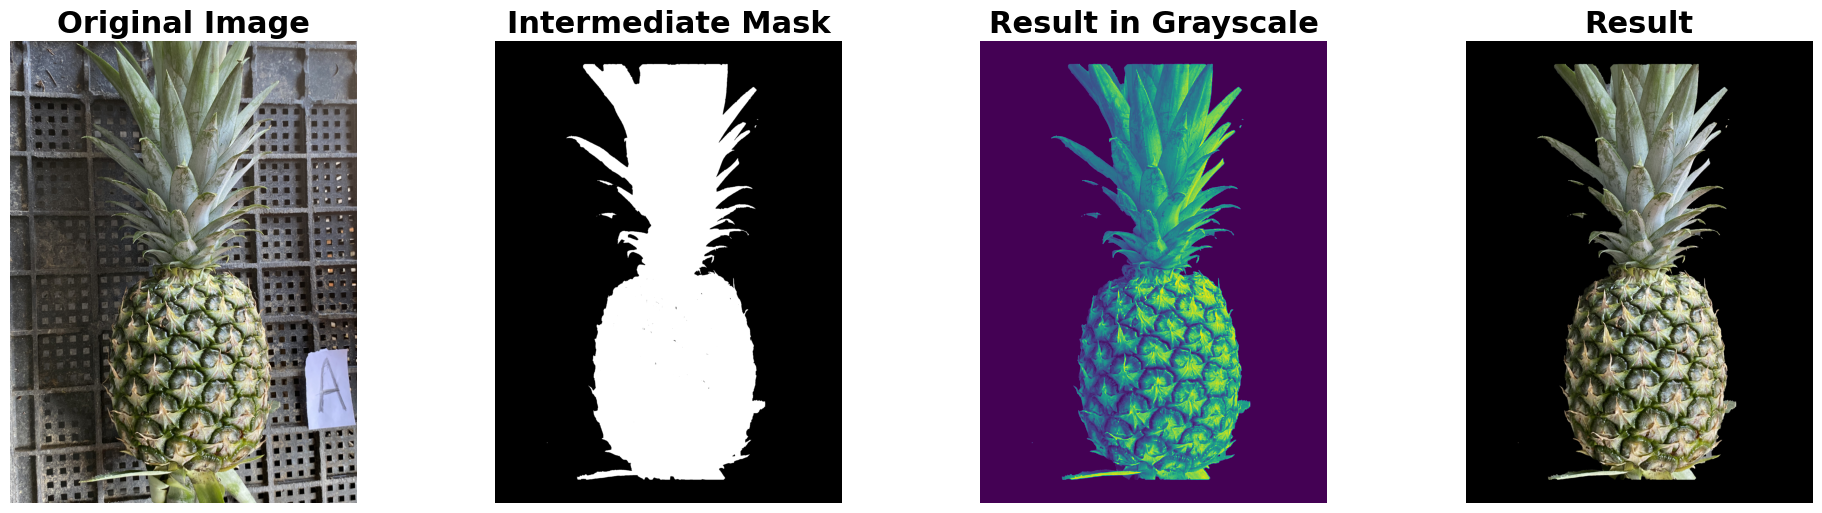

In [26]:
# 显示图像
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

ax[0].imshow(image_rgb)
ax[0].set_title('Original Image', fontsize=22, fontweight='bold')
ax[0].axis('off')

ax[1].imshow(intermediate_mask, cmap='gray')
ax[1].set_title('Intermediate Mask', fontsize=22, fontweight='bold')
ax[1].axis('off')

ax[2].imshow(result_gray)
ax[2].set_title('Result in Grayscale', fontsize=22, fontweight='bold')
ax[2].axis('off')

ax[3].imshow(result_rgb)
ax[3].set_title('Result', fontsize=22, fontweight='bold')
ax[3].axis('off')

plt.savefig('result.png',dpi=300)
plt.show()